<a href="https://colab.research.google.com/github/nitin578/103_Country_Covid19_Vaccinations/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
import seaborn as sns

In [34]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

#Canada Vaccination Data

In [4]:
Canada_df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/data/Canada.csv')

In [7]:
Canada_df.head()

,date,total_vaccinations,people_fully_vaccinated,total_boosters,people_vaccinated,location,source_url,vaccine
0,2020-12-14,5,0,0,5,Canada,https://covid19tracker.ca/vaccinationtracker.html,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
1,2020-12-15,727,0,0,727,Canada,https://covid19tracker.ca/vaccinationtracker.html,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
2,2020-12-16,3015,0,0,3015,Canada,https://covid19tracker.ca/vaccinationtracker.html,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
3,2020-12-17,7266,0,0,7266,Canada,https://covid19tracker.ca/vaccinationtracker.html,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
4,2020-12-18,11274,0,0,11274,Canada,https://covid19tracker.ca/vaccinationtracker.html,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"


In [9]:
Canada_df.columns

Index(['date', 'total_vaccinations', 'people_fully_vaccinated',
       'total_boosters', 'people_vaccinated', 'location', 'source_url',
       'vaccine'],
      dtype='object')

#>>>CANADA DATASET CLEANING >>>

**Removed the source_url column from the dataframe as it just stores the same links to destination**

In [10]:
# removing unwanted columns
columns_to_remove = ['source_url']
Canada_df.drop(labels=columns_to_remove, axis=1, inplace=True)

**Removed the Total Boosters column from the dataframe as it has no data with zero value.**

In [11]:
columns_to_remove = ['total_boosters']
Canada_df.drop(labels=columns_to_remove, axis=1, inplace=True)

**Checking the removed column**

In [12]:
Canada_df.columns

Index(['date', 'total_vaccinations', 'people_fully_vaccinated',
       'people_vaccinated', 'location', 'vaccine'],
      dtype='object')

In [40]:
#Missing values
Canada_df.isnull().count()

date                       322
total_vaccinations         322
people_fully_vaccinated    322
people_vaccinated          322
location                   322
vaccine                    322
dtype: int64

In [41]:
Canada_df.isnull().values.any()

False

In [42]:
display(Canada_df.dtypes.value_counts())

int64     3
object    3
dtype: int64

**Creating a BoxPlot for Total_Vaccinations**

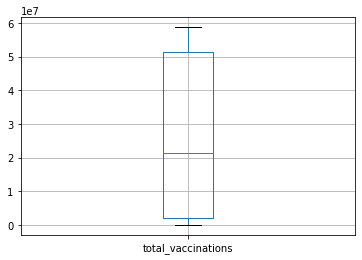

In [13]:
Canada_df.boxplot(column=['total_vaccinations'])

In [14]:
# check the unique values in vaccine column
Canada_df.vaccine.unique()

array(['Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'], dtype=object)

In [18]:
# Numerical values
numerical_features = [feature for feature in Canada_df.columns if Canada_df[feature].dtype != 'O']
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  3


In [20]:
Canada_df[numerical_features].head()

,total_vaccinations,people_fully_vaccinated,people_vaccinated
0,5,0,5
1,727,0,727
2,3015,0,3015
3,7266,0,7266
4,11274,0,11274


**Total Vaccinations provided in Canada**

58,663,274
58663274


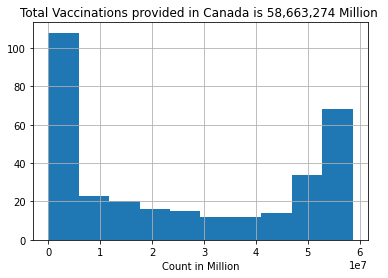

In [24]:
Canada_df[numerical_features].hist(column = 'total_vaccinations')
plt.xlabel("Count in Million")
plt.title("Total Vaccinations provided in Canada is 58,663,274 Million ")
column = Canada_df["total_vaccinations"]
max_value = column.max()
number_with_commas = "{:,}".format(58663274 )
print(number_with_commas)
print(max_value)

**People Vaccinated in Canada**

29,845,343
29845343


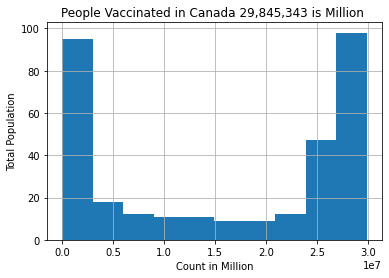

In [37]:
Canada_df[numerical_features].hist(column = 'people_vaccinated')
plt.xlabel("Count in Million")
plt.ylabel("Total Population")
plt.title("People Vaccinated in Canada 29,845,343 is Million ")
column = Canada_df["people_vaccinated"]
max_value = column.max()
number_with_commas = "{:,}".format(29845343)
print(number_with_commas)
print(max_value)

**People Fully Vaccinated in Canada**

28,272,392
28272392


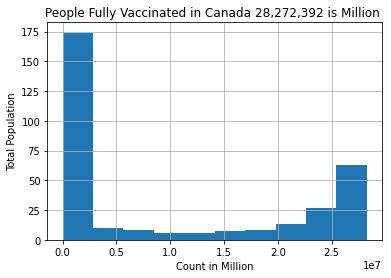

In [38]:
Canada_df[numerical_features].hist(column = 'people_fully_vaccinated')
plt.xlabel("Count in Million")
plt.ylabel("Total Population")
plt.title("People Fully Vaccinated in Canada 28,272,392 is Million ")
column = Canada_df["people_fully_vaccinated"]
max_value = column.max()
number_with_commas = "{:,}".format(28272392)
print(number_with_commas)
print(max_value)

**WordCloud for Vaccine**

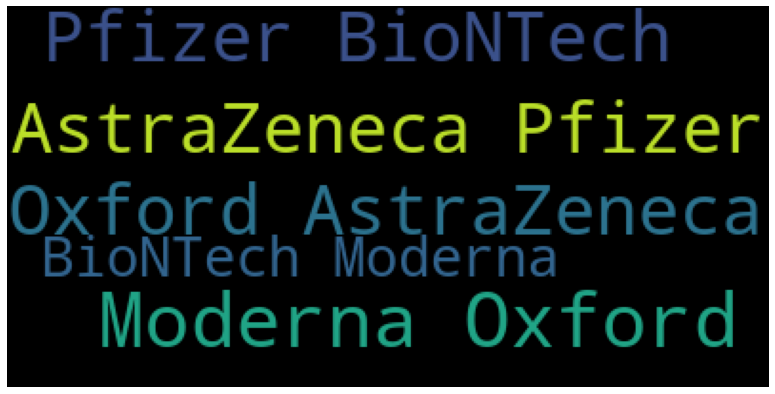

In [39]:
wordCloud = WordCloud(
    background_color='black',
    max_font_size = 40).generate(' '.join(Canada_df.vaccine))
plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

**HeatMap for Canada**

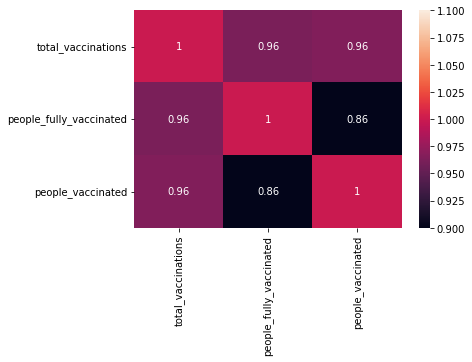

In [36]:
sns.heatmap(Canada_df[numerical_features].corr(), vmin=1, vmax=1, annot=True)

#UKRAINE Vaccination Data

In [43]:
Ukraine_df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/data/Ukraine.csv')

In [44]:
Ukraine_df.head()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,Ukraine,2021-02-24,Oxford/AstraZeneca,https://t.me/COVID19_Ukraine/1485,159,159,0,NaN
1,Ukraine,2021-02-25,Oxford/AstraZeneca,https://vaccination.covid19.gov.ua/,1338,1338,0,NaN
2,Ukraine,2021-02-26,Oxford/AstraZeneca,https://vaccination.covid19.gov.ua/,3051,3051,0,NaN
3,Ukraine,2021-02-27,Oxford/AstraZeneca,https://vaccination.covid19.gov.ua/,3141,3141,0,NaN
4,Ukraine,2021-03-01,Oxford/AstraZeneca,https://vaccination.covid19.gov.ua/,4905,4905,0,NaN


In [45]:
Ukraine_df.columns

Index(['location', 'date', 'vaccine', 'source_url', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters'],
      dtype='object')

#>>>UKRAINE DATASET CLEANING >>>

**Removed the source_url column from the dataframe as it just stores the same links to destination**

In [46]:
# removing unwanted columns
columns_to_remove = ['source_url']
Ukraine_df.drop(labels=columns_to_remove, axis=1, inplace=True)

**Removed the Total Boosters column from the dataframe as it has no data with zero value.**

In [47]:
columns_to_remove = ['total_boosters']
Ukraine_df.drop(labels=columns_to_remove, axis=1, inplace=True)

**Checking the removed column**

In [48]:
Ukraine_df.columns

Index(['location', 'date', 'vaccine', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated'],
      dtype='object')

In [49]:
#Missing values
Ukraine_df.isnull().count()

location                   238
date                       238
vaccine                    238
total_vaccinations         238
people_vaccinated          238
people_fully_vaccinated    238
dtype: int64

In [50]:
Ukraine_df.isnull().values.any()

False

In [51]:
display(Ukraine_df.dtypes.value_counts())

int64     3
object    3
dtype: int64

**Creating a BoxPlot for Total_Vaccinations**

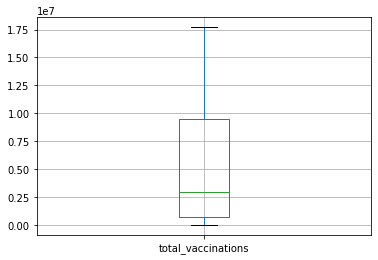

In [52]:
Ukraine_df.boxplot(column=['total_vaccinations'])

In [53]:
# check the unique values in vaccine column
Ukraine_df.vaccine.unique()

array(['Oxford/AstraZeneca', 'Oxford/AstraZeneca, Sinovac',
       'Oxford/AstraZeneca, Sinovac, Pfizer/BioNTech',
       'Moderna, Oxford/AstraZeneca, Sinovac, Pfizer/BioNTech'],
      dtype=object)

In [54]:
# Numerical values
numerical_features = [feature for feature in Canada_df.columns if Canada_df[feature].dtype != 'O']
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  3


In [55]:
Ukraine_df[numerical_features].head()

,total_vaccinations,people_fully_vaccinated,people_vaccinated
0,159,0,159
1,1338,0,1338
2,3051,0,3051
3,3141,0,3141
4,4905,0,4905


**Total Vaccinations provided in Ukraine**

17,695,591
17695591


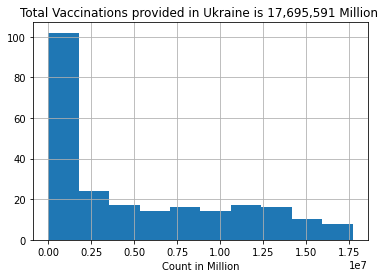

In [67]:
Ukraine_df[numerical_features].hist(column = 'total_vaccinations')
plt.xlabel("Count in Million")
plt.title("Total Vaccinations provided in Ukraine is 17,695,591 Million ")
column = Ukraine_df["total_vaccinations"]
max_value = column.max()
number_with_commas = "{:,}".format(17695591)
print(number_with_commas)
print(max_value)

**People Vaccinated in Ukraine**

10,245,773
10245773


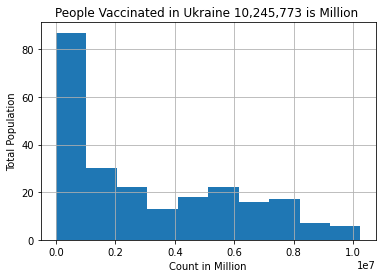

In [64]:
Ukraine_df[numerical_features].hist(column = 'people_vaccinated')
plt.xlabel("Count in Million")
plt.ylabel("Total Population")
plt.title("People Vaccinated in Ukraine 10,245,773 is Million ")
column = Ukraine_df["people_vaccinated"]
max_value = column.max()
number_with_commas = "{:,}".format(10245773)
print(number_with_commas)
print(max_value)

**People Fully Vaccinated in Ukraine**

7,449,818
7449818


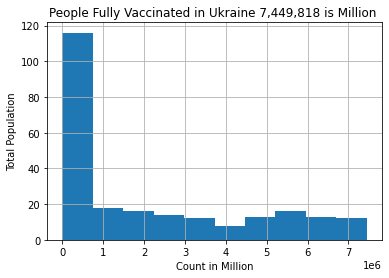

In [62]:
Ukraine_df[numerical_features].hist(column = 'people_fully_vaccinated')
plt.xlabel("Count in Million")
plt.ylabel("Total Population")
plt.title("People Fully Vaccinated in Ukraine 7,449,818 is Million ")
column = Ukraine_df["people_fully_vaccinated"]
max_value = column.max()
number_with_commas = "{:,}".format(7449818)
print(number_with_commas)
print(max_value)

**WordCloud for Vaccine**

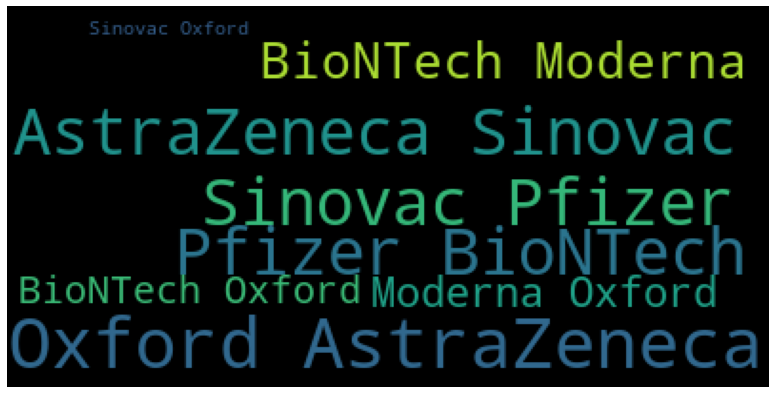

In [59]:
wordCloud = WordCloud(
    background_color='black',
    max_font_size = 40).generate(' '.join(Ukraine_df.vaccine))
plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

**HeatMap for Ukraine**

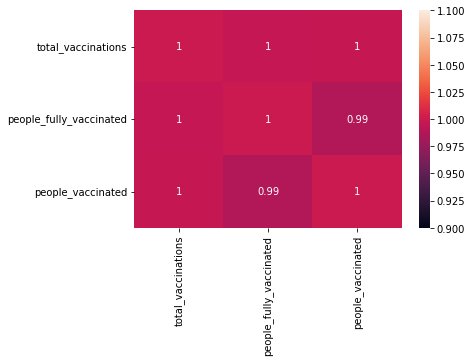

In [60]:
sns.heatmap(Ukraine_df[numerical_features].corr(), vmin=1, vmax=1, annot=True)

#INDIA Vaccination Data

In [68]:
India_df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/data/India.csv')

In [69]:
India_df.head()

,location,date,vaccine,total_vaccinations,people_vaccinated,people_fully_vaccinated,source_url,total_boosters
0,India,2021-01-15,"Covaxin, Oxford/AstraZeneca",0,0,0,https://twitter.com/MoHFW_INDIA/status/1350459...,NaN
1,India,2021-01-16,"Covaxin, Oxford/AstraZeneca",191181,191181,0,https://twitter.com/MoHFW_INDIA/status/1350459...,NaN
2,India,2021-01-17,"Covaxin, Oxford/AstraZeneca",224301,224301,0,https://twitter.com/MoHFW_INDIA/status/1350815...,NaN
3,India,2021-01-18,"Covaxin, Oxford/AstraZeneca",454049,454049,0,https://www.mohfw.gov.in/,NaN
4,India,2021-01-19,"Covaxin, Oxford/AstraZeneca",674835,674835,0,https://www.mohfw.gov.in/,NaN



#>>>INDIA DATASET CLEANING >>>

In [70]:
India_df.columns

Index(['location', 'date', 'vaccine', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'source_url',
       'total_boosters'],
      dtype='object')

**Removed the source_url column from the dataframe as it just stores the same links to destination**

In [71]:
# removing unwanted columns
columns_to_remove = ['source_url']
India_df.drop(labels=columns_to_remove, axis=1, inplace=True)

**Removed the Total Boosters column from the dataframe as it has no data with zero value.**

In [72]:
columns_to_remove = ['total_boosters']
India_df.drop(labels=columns_to_remove, axis=1, inplace=True)

**Checking the removed column**

In [73]:
India_df.columns

Index(['location', 'date', 'vaccine', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated'],
      dtype='object')

In [74]:
#Missing values
India_df.isnull().count()

location                   283
date                       283
vaccine                    283
total_vaccinations         283
people_vaccinated          283
people_fully_vaccinated    283
dtype: int64

In [75]:
India_df.isnull().values.any()

False

In [76]:
display(India_df.dtypes.value_counts())

int64     3
object    3
dtype: int64

**Creating a BoxPlot for Total_Vaccinations**

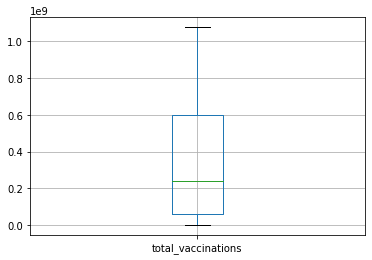

In [77]:
India_df.boxplot(column=['total_vaccinations'])

In [78]:
India_df.vaccine.unique()

array(['Covaxin, Oxford/AstraZeneca',
       'Covaxin, Oxford/AstraZeneca, Sputnik V'], dtype=object)

In [79]:
# Numerical values
numerical_features = [feature for feature in India_df.columns if India_df[feature].dtype != 'O']
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  3


In [80]:
India_df[numerical_features].head()

,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,0,0,0
1,191181,191181,0
2,224301,224301,0
3,454049,454049,0
4,674835,674835,0


**Total Vaccinations provided in India**

1,077,107,323
1077107323


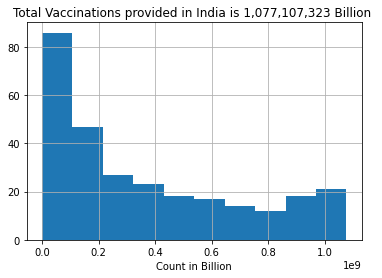

In [94]:
India_df[numerical_features].hist(column = 'total_vaccinations')
plt.xlabel("Count in Billion")
plt.title("Total Vaccinations provided in India is 1,077,107,323 Billion ")
column = India_df["total_vaccinations"]
max_value = column.max()
number_with_commas = "{:,}".format(1077107323 )
print(number_with_commas)
print(max_value)

**People Vaccinated in India**

739,357,801
739357801


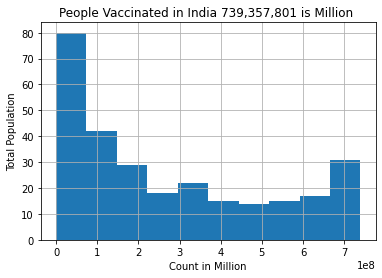

In [90]:
India_df[numerical_features].hist(column = 'people_vaccinated')
plt.xlabel("Count in Million")
plt.ylabel("Total Population")
plt.title("People Vaccinated in India 739,357,801 is Million ")
column = India_df["people_vaccinated"]
max_value = column.max()
number_with_commas = "{:,}".format(739357801)
print(number_with_commas)
print(max_value)

**People Fully Vaccinated in India**

337,749,522
337749522


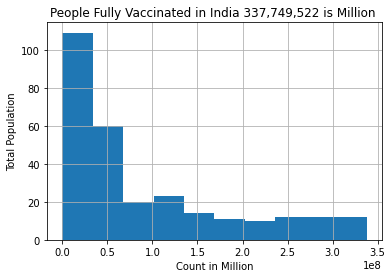

In [88]:
India_df[numerical_features].hist(column = 'people_fully_vaccinated')
plt.xlabel("Count in Million")
plt.ylabel("Total Population")
plt.title("People Fully Vaccinated in India 337,749,522 is Million ")
column = India_df["people_fully_vaccinated"]
max_value = column.max()
number_with_commas = "{:,}".format(337749522)
print(number_with_commas)
print(max_value)

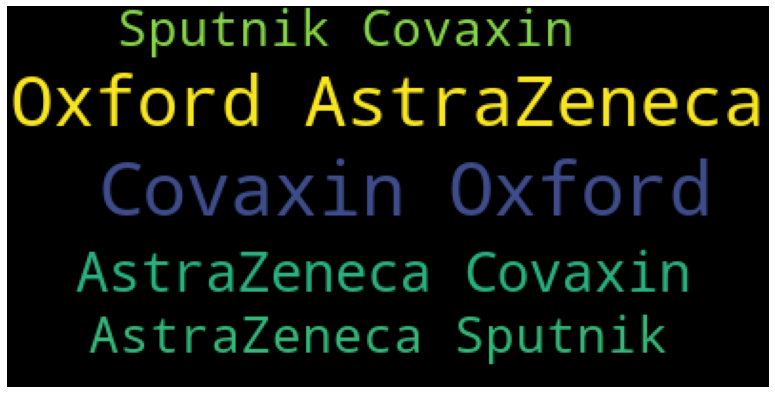

In [84]:
wordCloud = WordCloud(
    background_color='black',
    max_font_size = 40).generate(' '.join(India_df.vaccine))
plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

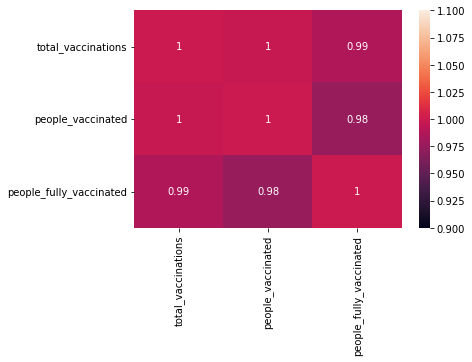

In [85]:
sns.heatmap(India_df[numerical_features].corr(), vmin=1, vmax=1, annot=True)